In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retaildataset/stores data-set.csv
/kaggle/input/retaildataset/Features data set.csv
/kaggle/input/retaildataset/sales data-set.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_stores = pd.read_csv('/kaggle/input/retaildataset/stores data-set.csv')
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
df_features = pd.read_csv('/kaggle/input/retaildataset/Features data set.csv')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
df_sales = pd.read_csv('/kaggle/input/retaildataset/sales data-set.csv')
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [6]:
df_stores_features = df_stores.merge(right = df_features, on = 'Store')

df_merge = df_stores_features.merge(right = df_sales, on = ['Store', 'Date', 'IsHoliday'])
df_merge.sample(10)

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
323305,34,A,158114,29/10/2010,50.78,2.718,NaN,NaN,NaN,NaN,NaN,126.436419,10.210,False,46,14232.46
78914,9,B,125833,05/03/2010,48.43,2.625,NaN,NaN,NaN,NaN,NaN,214.905472,6.415,False,4,16630.68
20304,2,A,202307,12/10/2012,60.97,3.601,2145.50,NaN,33.31,586.83,10421.01,223.015426,6.170,False,40,78961.25
309379,32,A,203007,29/07/2011,75.91,3.547,NaN,NaN,NaN,NaN,NaN,193.711525,8.622,False,25,7041.43
345494,36,A,39910,18/05/2012,73.70,3.713,367.23,NaN,NaN,NaN,1704.18,220.425215,6.989,False,94,38239.45
38018,4,A,205863,11/05/2012,67.64,3.685,20499.88,86.00,103.05,5005.96,3815.16,131.145333,4.308,False,30,7660.06
101232,11,A,207499,07/01/2011,54.43,2.976,NaN,NaN,NaN,NaN,NaN,214.695510,7.551,False,56,485.20
101780,11,A,207499,04/03/2011,66.50,3.288,NaN,NaN,NaN,NaN,NaN,217.171698,7.551,False,44,4172.92
318940,33,A,39690,09/03/2012,62.20,3.963,128.45,3.68,0.99,NaN,1640.64,130.741379,7.603,False,2,9166.00
390269,41,A,196321,10/08/2012,71.73,3.509,11523.22,78.18,6.43,5132.40,2667.30,198.079565,6.432,False,95,109798.93


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Type          421570 non-null  object 
 2   Size          421570 non-null  int64  
 3   Date          421570 non-null  object 
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Dept          421570 non-null  int64  
 15  Weekly_Sales  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [8]:
df_merge.describe()

,Store,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123
std,12.785297,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519
min,1.000000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


#### Converting date column into datetime

In [9]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

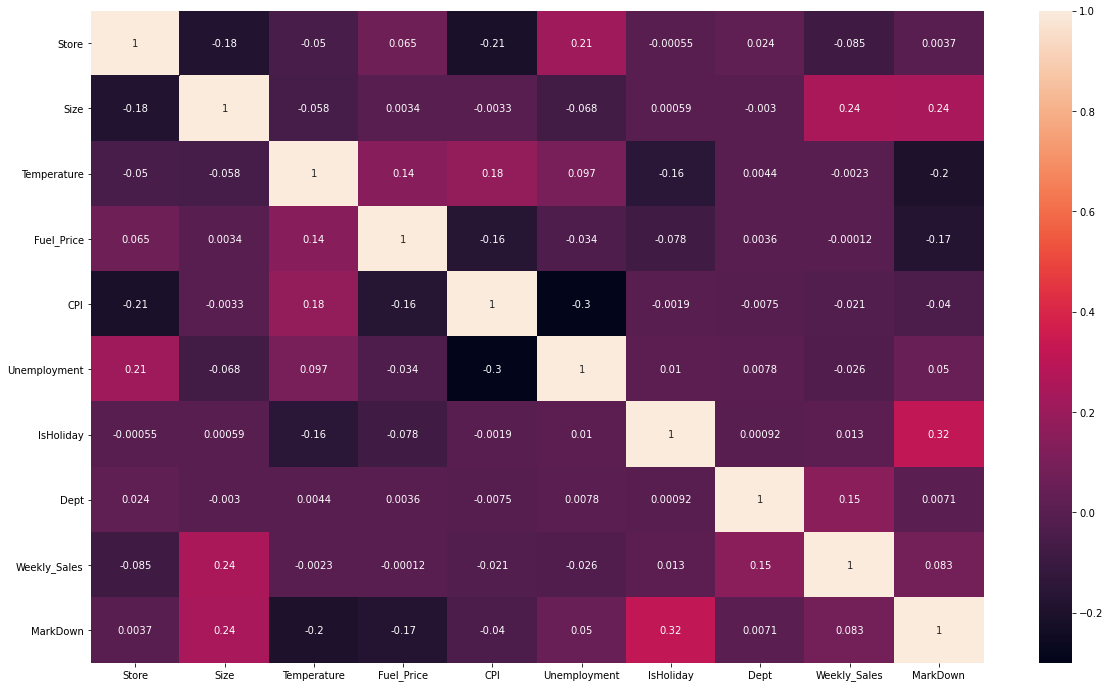

In [10]:
df_temp = df_merge.copy(deep=True)
df_temp['MarkDown'] = df_temp['MarkDown1'] + df_temp['MarkDown2'] +df_temp['MarkDown3'] +df_temp['MarkDown4'] + df_temp['MarkDown5']
df_temp.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], inplace = True, axis = 1)
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_temp.corr(),annot=True)
# df_temp.head

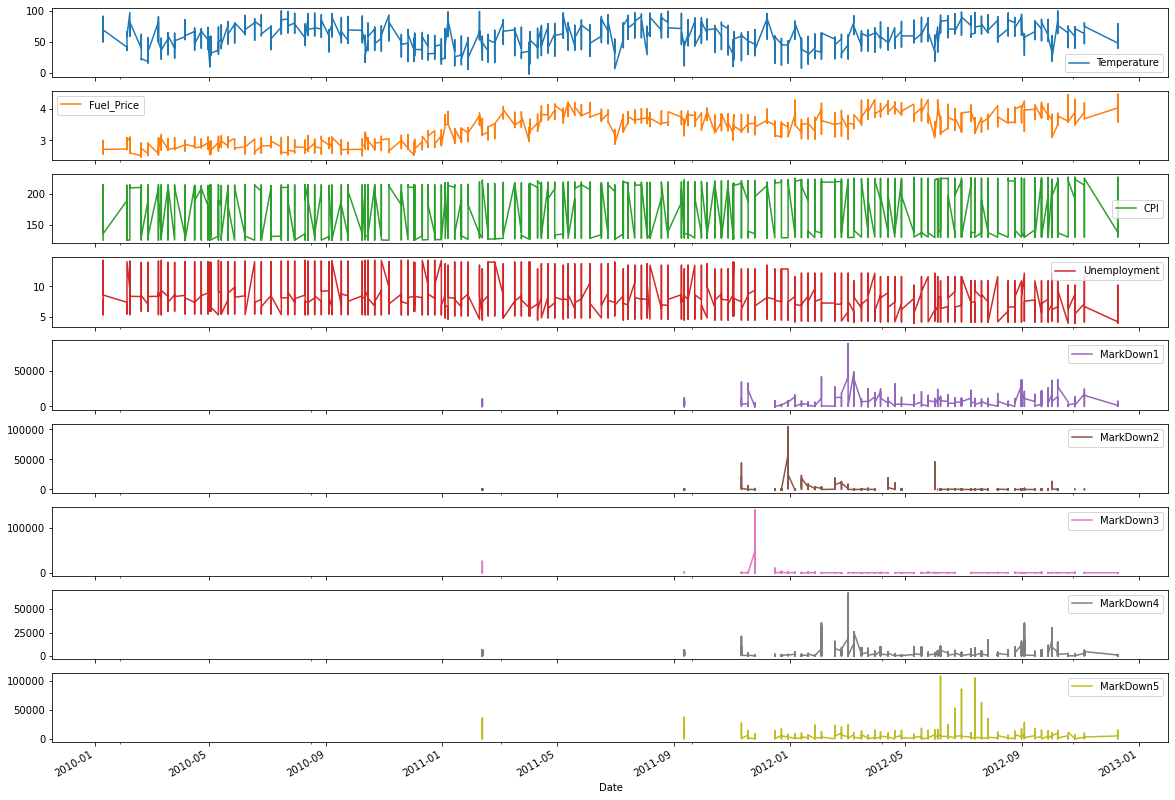

In [11]:
df_merge[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(20,15))
plt.show()

### Cumulative Weekly Sales Plot

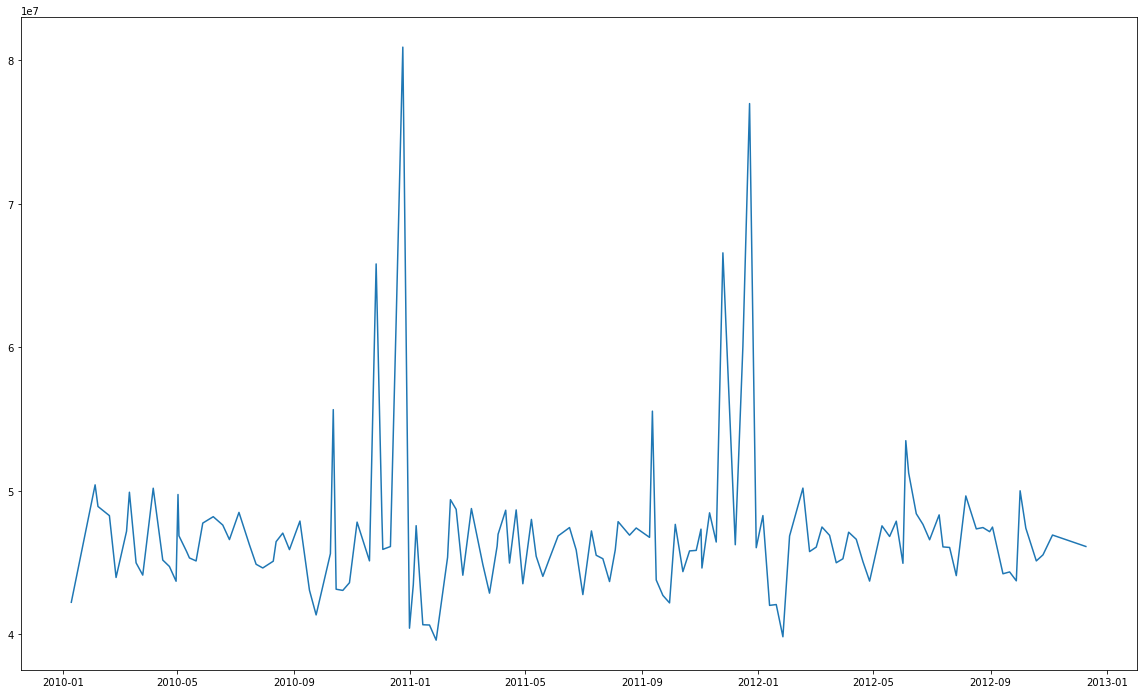

In [12]:
df_temp = df_merge.groupby('Date').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.plot('Date', 'Weekly_Sales', data=df_temp)

In [13]:
df_merge.Date.apply(lambda x: x.month)

0          5
1          5
2          5
3          5
4          5
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Date, Length: 421570, dtype: int64

Text(0, 0.5, 'Sales')

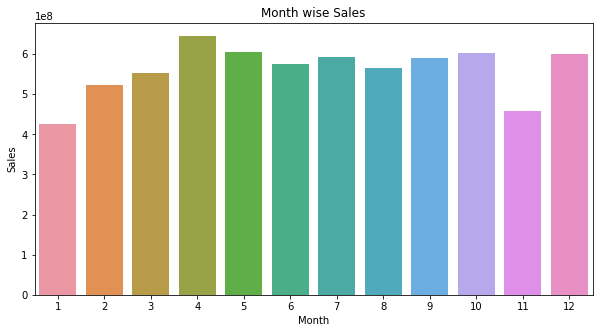

In [14]:
df_temp = df_merge.groupby(df_merge.Date.apply(lambda x: x.month)).sum()['Weekly_Sales'].reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=df_temp.Date,y=df_temp.Weekly_Sales)
plt.title("Month wise Sales")
plt.xlabel("Month")
plt.ylabel("Sales")

### Performance Based on Stores

<BarContainer object of 3 artists>

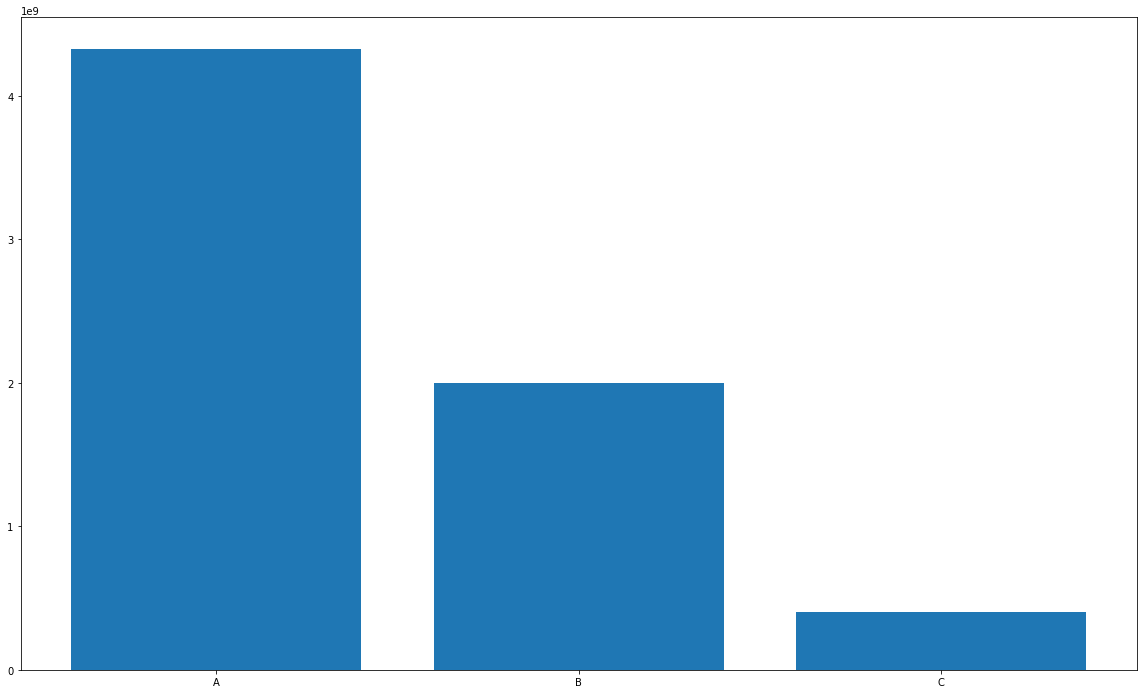

In [15]:
df_temp = df_merge.groupby('Type').sum()['Weekly_Sales'].reset_index()
fig, ax = plt.subplots(figsize=(20,12))
ax.bar('Type', 'Weekly_Sales', data=df_temp)